<a href="https://colab.research.google.com/github/Devansh55-a/Correlation_Project/blob/main/corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle  # Create the .kaggle folder
!cp kaggle.json ~/.kaggle/  # Move kaggle.json to .kaggle folder
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions
!pip install kaggle

In [ ]:
!kaggle datasets download -d danielgrijalvas/movies
!unzip movies.zip

Dataset URL: https://www.kaggle.com/datasets/danielgrijalvas/movies
License(s): CC0-1.0
  0% 0.00/424k [00:00<?, ?B/s]
100% 424k/424k [00:00<00:00, 101MB/s]
Archive:  movies.zip
  inflating: movies.csv              


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)


df=pd.read_csv('movies.csv')

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
for col in df.columns:
  pct_missing=np.mean(df[col].isnull())
  print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [ ]:
# Define columns with missing values and their thresholds for filling or dropping
fill_median_columns = ['budget', 'gross', 'runtime']  # Numerical columns
fill_mode_columns = ['rating', 'released', 'score', 'votes', 'writer', 'star', 'country', 'company']  # Categorical columns

# Fill missing values in numerical columns with the median
for column in fill_median_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Fill missing values in categorical columns with the mode (most common value)
for column in fill_mode_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-14-9b33b5e33c74>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-14-9b33b5e33c74>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
for col in df.columns:
  pct_missing=np.mean(df[col].isnull())
print('{}- {}%'.format,(col,pct_missing))



<built-in method format of str object at 0x7ed39198edb0> ('runtime', 0.0)


In [ ]:
df['gross']= df['gross'].astype('int64')
df['budget']=df['budget'].astype('int64')

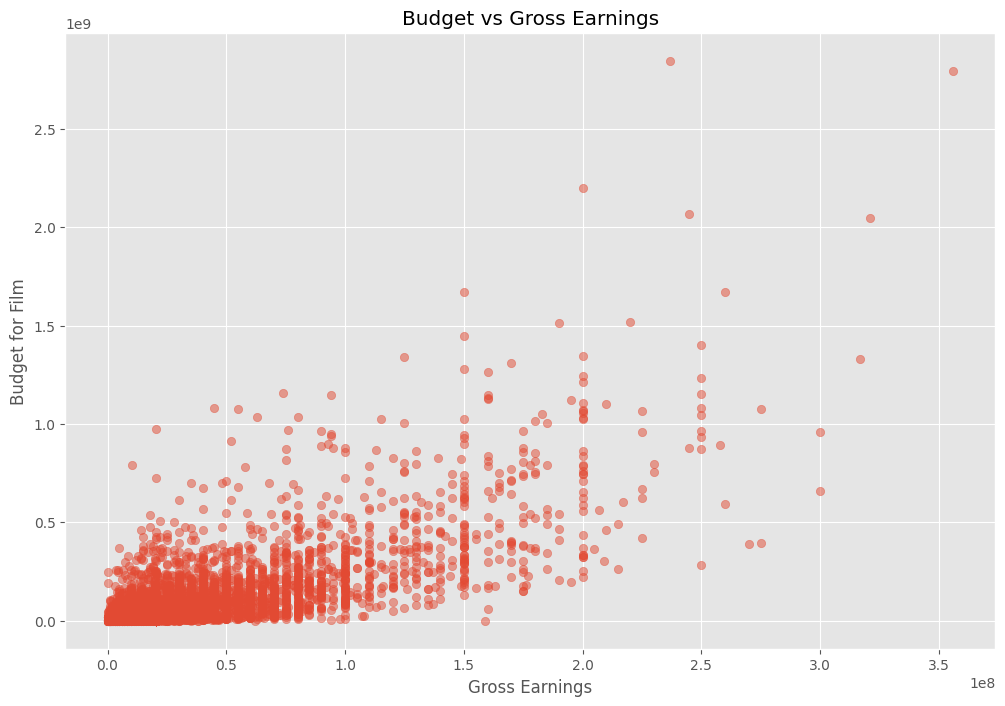

In [ ]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

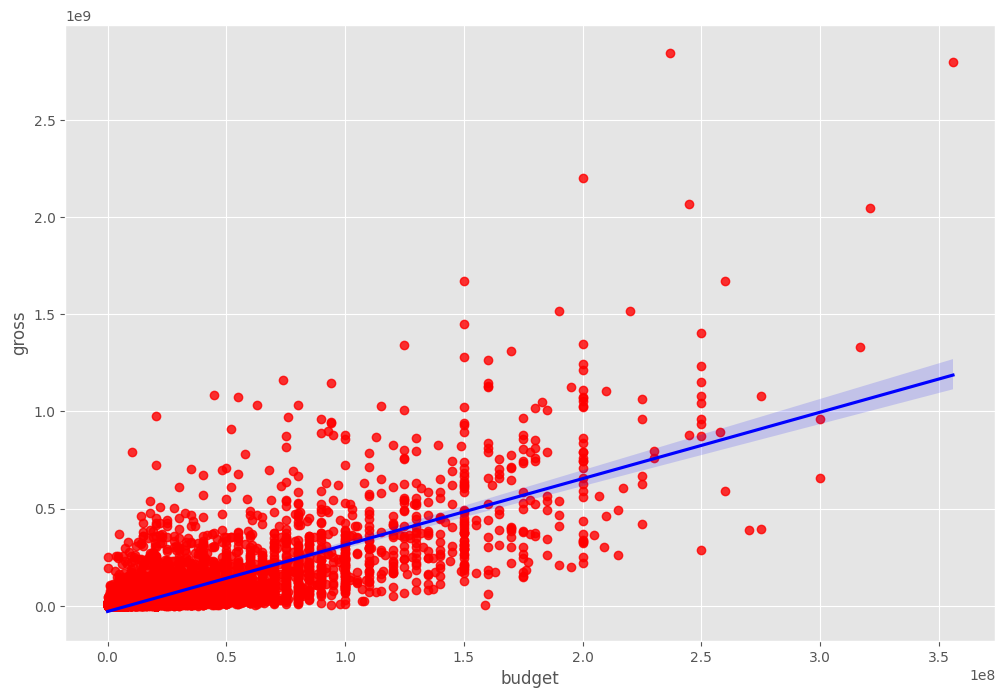

In [ ]:
sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Adjust types if necessary
correlation_matrix = numeric_df.corr(method='pearson')
print(correlation_matrix)


             year     score     votes    budget     gross   runtime
year     1.000000  0.098084  0.222485  0.291690  0.259504  0.120662
score    0.098084  1.000000  0.409123  0.061896  0.185548  0.399411
votes    0.222485  0.409123  1.000000  0.461001  0.632124  0.309137
budget   0.291690  0.061896  0.461001  1.000000  0.745881  0.273371
gross    0.259504  0.185548  0.632124  0.745881  1.000000  0.244380
runtime  0.120662  0.399411  0.309137  0.273371  0.244380  1.000000


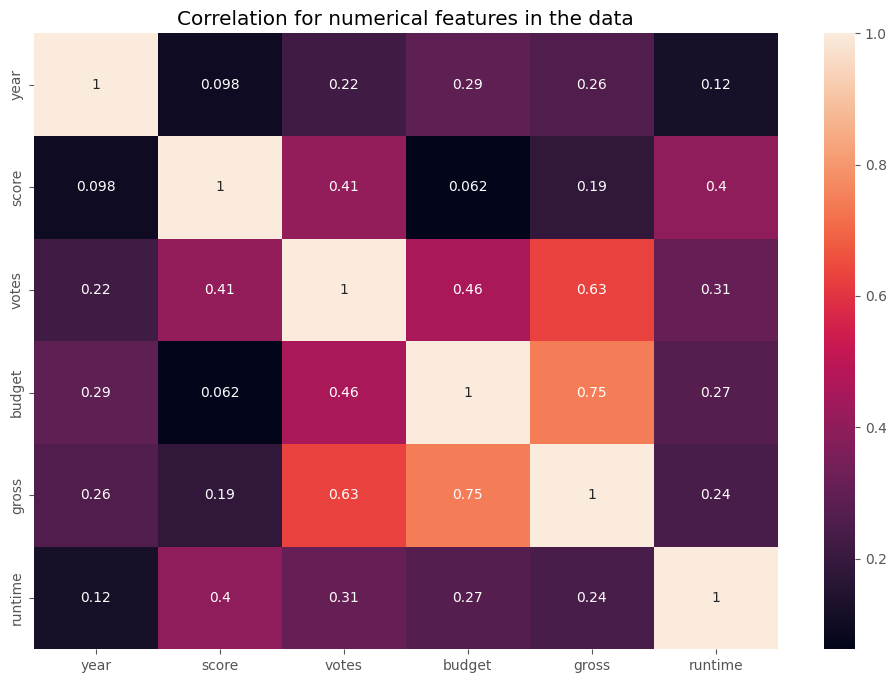

In [ ]:

sns.heatmap(correlation_matrix,annot=True)
plt.title("Correlation for numerical features in the data")
plt.show()